Módulo 7 - Exercício

In [1]:
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import re # para mexer com regexp
from keras.utils import to_categorical
from doc3 import training_doc3

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biavatti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
print(training_doc3)


how many people live in atlanta georgia	Atlanta ( , stressed , locally ) is the capital of and the most populous city in the U.S. state of Georgia , with an estimated 2011 population of 432,427 .	1
how many people live in atlanta georgia	Atlanta is the cultural and economic center of the Atlanta metropolitan area , home to 5,457,831 people and the ninth largest metropolitan area in the United States .	1
how many people live in atlanta georgia	Atlanta is the county seat of Fulton County , and a small portion of the city extends eastward into DeKalb County .	0
how many people live in atlanta georgia	Atlanta was established in 1837 at the intersection of two railroad lines , and the city rose from the ashes of the Civil War to become a national center of commerce .	0
how many people live in atlanta georgia	In the decades following the Civil Rights Movement , during which the city earned a reputation as `` too busy to hate '' for the progressive views of its citizens and leaders , Atlanta

In [4]:
cleaned = re.sub(r'\W+', ' ', training_doc3).lower()
tokens = word_tokenize(cleaned)

train_len = 4 # vamos usar 4 aqui e é esperado que a gente use 3 palavras na hora de fazer query
text_sequences = []
for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences) 

#Collecting some information   
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences), train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [5]:
k = np.random.choice(range(len(n_sequences)))
for i in sequences[k]:
    print(tokens[i])

831
atlanta
0
people


In [6]:
train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]
train_targets = to_categorical(train_targets, num_classes=vocabulary_size) # one hot encoding
seq_len = train_inputs.shape[1]

print(train_inputs.shape)

(1392, 3)


In [7]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
#model = load_model("mymodel.h5")

model = Sequential()
model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50,activation='relu'))
model.add(Dense(vocabulary_size, activation='softmax'))
print(model.summary())

# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 3)              1365      
                                                                 
 lstm (LSTM)                 (None, 3, 50)             10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 455)               23205     
                                                                 
Total params: 58,120
Trainable params: 58,120
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(train_inputs,train_targets,epochs=500,verbose=1)
model.save("mymodel.h5")

Epoch 1/500
44/44 [==============================] - 6s 6ms/step - loss: 6.0681 - accuracy: 0.0754
Epoch 2/500
44/44 [==============================] - 0s 6ms/step - loss: 5.3494 - accuracy: 0.0797
Epoch 3/500
44/44 [==============================] - 0s 6ms/step - loss: 5.0690 - accuracy: 0.0797
Epoch 4/500
44/44 [==============================] - 0s 7ms/step - loss: 4.9609 - accuracy: 0.0797
Epoch 5/500
44/44 [==============================] - 0s 6ms/step - loss: 4.8844 - accuracy: 0.0797
Epoch 6/500
44/44 [==============================] - 0s 5ms/step - loss: 4.8325 - accuracy: 0.0841
Epoch 7/500
44/44 [==============================] - 0s 6ms/step - loss: 4.7841 - accuracy: 0.0826
Epoch 8/500
44/44 [==============================] - 0s 5ms/step - loss: 4.7304 - accuracy: 0.0948
Epoch 9/500
44/44 [==============================] - 0s 6ms/step - loss: 4.6754 - accuracy: 0.0970
Epoch 10/500
44/44 [==============================] - 0s 7ms/step - loss: 4.6042 - accuracy: 0.1070
Epoch 11/

44/44 [==============================] - 0s 5ms/step - loss: 2.3869 - accuracy: 0.3779
Epoch 84/500
44/44 [==============================] - 0s 5ms/step - loss: 2.3655 - accuracy: 0.3786
Epoch 85/500
44/44 [==============================] - 0s 5ms/step - loss: 2.3567 - accuracy: 0.3807
Epoch 86/500
44/44 [==============================] - 0s 6ms/step - loss: 2.3515 - accuracy: 0.3815
Epoch 87/500
44/44 [==============================] - 0s 5ms/step - loss: 2.3420 - accuracy: 0.3843
Epoch 88/500
44/44 [==============================] - 0s 5ms/step - loss: 2.3107 - accuracy: 0.3858
Epoch 89/500
44/44 [==============================] - 0s 7ms/step - loss: 2.3136 - accuracy: 0.3922
Epoch 90/500
44/44 [==============================] - 0s 7ms/step - loss: 2.3000 - accuracy: 0.3858
Epoch 91/500
44/44 [==============================] - 0s 6ms/step - loss: 2.2869 - accuracy: 0.3743
Epoch 92/500
44/44 [==============================] - 0s 6ms/step - loss: 2.2720 - accuracy: 0.3901
Epoch 93/500


44/44 [==============================] - 0s 7ms/step - loss: 1.4769 - accuracy: 0.5747
Epoch 165/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4542 - accuracy: 0.5891
Epoch 166/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4466 - accuracy: 0.5761
Epoch 167/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4270 - accuracy: 0.5927
Epoch 168/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4127 - accuracy: 0.5934
Epoch 169/500
44/44 [==============================] - 0s 5ms/step - loss: 1.4332 - accuracy: 0.5797
Epoch 170/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4356 - accuracy: 0.5812
Epoch 171/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4343 - accuracy: 0.5682
Epoch 172/500
44/44 [==============================] - 0s 6ms/step - loss: 1.4014 - accuracy: 0.5826
Epoch 173/500
44/44 [==============================] - 0s 6ms/step - loss: 1.3778 - accuracy: 0.6042
Epoc

44/44 [==============================] - 0s 6ms/step - loss: 0.9836 - accuracy: 0.7069
Epoch 246/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9967 - accuracy: 0.7026
Epoch 247/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9796 - accuracy: 0.6897
Epoch 248/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9550 - accuracy: 0.7105
Epoch 249/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9689 - accuracy: 0.7098
Epoch 250/500
44/44 [==============================] - 0s 5ms/step - loss: 0.9585 - accuracy: 0.7162
Epoch 251/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9485 - accuracy: 0.7083
Epoch 252/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9464 - accuracy: 0.7062
Epoch 253/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9565 - accuracy: 0.7134
Epoch 254/500
44/44 [==============================] - 0s 6ms/step - loss: 0.9322 - accuracy: 0.7213
Epoc

44/44 [==============================] - 0s 7ms/step - loss: 0.6733 - accuracy: 0.7866
Epoch 327/500
44/44 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.8010
Epoch 328/500
44/44 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.7981
Epoch 329/500
44/44 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.7931
Epoch 330/500
44/44 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.7881
Epoch 331/500
44/44 [==============================] - 0s 8ms/step - loss: 0.6614 - accuracy: 0.8039
Epoch 332/500
44/44 [==============================] - 0s 7ms/step - loss: 0.6569 - accuracy: 0.8024
Epoch 333/500
44/44 [==============================] - 0s 7ms/step - loss: 0.6611 - accuracy: 0.8039
Epoch 334/500
44/44 [==============================] - 0s 7ms/step - loss: 0.6604 - accuracy: 0.7909
Epoch 335/500
44/44 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.7960
Epoc

44/44 [==============================] - 0s 6ms/step - loss: 0.5438 - accuracy: 0.8312
Epoch 408/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.8326
Epoch 409/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5745 - accuracy: 0.8197
Epoch 410/500
44/44 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.8103
Epoch 411/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5756 - accuracy: 0.8161
Epoch 412/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5797 - accuracy: 0.8161
Epoch 413/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5635 - accuracy: 0.8168
Epoch 414/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.8254
Epoch 415/500
44/44 [==============================] - 0s 7ms/step - loss: 0.5488 - accuracy: 0.8326
Epoch 416/500
44/44 [==============================] - 0s 6ms/step - loss: 0.5259 - accuracy: 0.8384
Epoc

44/44 [==============================] - 0s 7ms/step - loss: 0.4446 - accuracy: 0.8520
Epoch 489/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4795 - accuracy: 0.8499
Epoch 490/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.8463
Epoch 491/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4783 - accuracy: 0.8420
Epoch 492/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4758 - accuracy: 0.8506
Epoch 493/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4281 - accuracy: 0.8664
Epoch 494/500
44/44 [==============================] - 0s 6ms/step - loss: 0.4152 - accuracy: 0.8700
Epoch 495/500
44/44 [==============================] - 0s 6ms/step - loss: 0.3969 - accuracy: 0.8772
Epoch 496/500
44/44 [==============================] - 0s 6ms/step - loss: 0.3906 - accuracy: 0.8721
Epoch 497/500
44/44 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8807
Epoc

In [9]:
from keras_preprocessing.sequence import pad_sequences

input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
print(encoded_text, pad_encoded)

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    pred_word = tokenizer.index_word[i]
    print("Next word suggestion:",pred_word)

how many people
[6, 4, 3] [[6 4 3]]
1/1 [==============================] - 1s 1s/step
Next word suggestion: died
Next word suggestion: visit
Next word suggestion: live


In [10]:
# fazendo uploud do arquivo de teste, foi pego 5 livros do site do gutenberg e criado um unico txt.
texto = open("Kafka.txt" , "r")
print (texto)
texto = texto.read()

<_io.TextIOWrapper name='Kafka.txt' mode='r' encoding='cp1252'>


In [11]:
cleaned = re.sub(r'\W+', ' ', texto).lower()
tokens = word_tokenize(cleaned)

train_len = 3+1
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
        
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences) 

#Collecting some information   
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [12]:
vocabulary_size

3016

In [13]:
len(n_sequences)

25642

In [14]:
train_inputs = n_sequences[:, :-1]
train_targets = n_sequences[:, -1]
train_targets = to_categorical(train_targets, num_classes = vocabulary_size)
seq_len = train_inputs.shape[1]
print(train_inputs.shape)
print(train_targets[0])

(25642, 3)
[0. 0. 0. ... 0. 0. 0.]


In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
#model = load_model("mymodel.h5")

model = Sequential()
model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50,activation='relu'))
model.add(Dense(vocabulary_size, activation='softmax'))
print(model.summary())

# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 3)              9048      
                                                                 
 lstm_2 (LSTM)               (None, 3, 50)             10800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 3016)              153816    
                                                                 
Total params: 196,414
Trainable params: 196,414
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.fit(train_inputs, train_targets, epochs=500, verbose=1)

Epoch 1/500
802/802 [==============================] - 13s 9ms/step - loss: 6.4713 - accuracy: 0.0500
Epoch 2/500
802/802 [==============================] - 7s 9ms/step - loss: 6.1805 - accuracy: 0.0519
Epoch 3/500
802/802 [==============================] - 7s 9ms/step - loss: 6.1443 - accuracy: 0.0519
Epoch 4/500
802/802 [==============================] - 7s 9ms/step - loss: 6.0644 - accuracy: 0.0519
Epoch 5/500
802/802 [==============================] - 7s 8ms/step - loss: 5.9481 - accuracy: 0.0539
Epoch 6/500
802/802 [==============================] - 7s 9ms/step - loss: 5.7627 - accuracy: 0.0631
Epoch 7/500
802/802 [==============================] - 7s 8ms/step - loss: 5.6186 - accuracy: 0.0688
Epoch 8/500
802/802 [==============================] - 7s 9ms/step - loss: 5.4993 - accuracy: 0.0763
Epoch 9/500
802/802 [==============================] - 7s 8ms/step - loss: 5.3869 - accuracy: 0.0867
Epoch 10/500
802/802 [==============================] - 7s 8ms/step - loss: 5.2719 - accur

802/802 [==============================] - 9s 11ms/step - loss: 3.0533 - accuracy: 0.2875
Epoch 82/500
802/802 [==============================] - 9s 11ms/step - loss: 3.0453 - accuracy: 0.2886
Epoch 83/500
802/802 [==============================] - 8s 10ms/step - loss: 3.0292 - accuracy: 0.2923
Epoch 84/500
802/802 [==============================] - 9s 11ms/step - loss: 3.0282 - accuracy: 0.2935
Epoch 85/500
802/802 [==============================] - 9s 11ms/step - loss: 3.0184 - accuracy: 0.2953
Epoch 86/500
802/802 [==============================] - 9s 12ms/step - loss: 3.0112 - accuracy: 0.2963
Epoch 87/500
802/802 [==============================] - 8s 11ms/step - loss: 2.9982 - accuracy: 0.2992
Epoch 88/500
802/802 [==============================] - 9s 11ms/step - loss: 2.9885 - accuracy: 0.3004
Epoch 89/500
802/802 [==============================] - 9s 11ms/step - loss: 2.9832 - accuracy: 0.2987
Epoch 90/500
802/802 [==============================] - 9s 11ms/step - loss: 2.9737 - 

802/802 [==============================] - 10s 13ms/step - loss: 2.5516 - accuracy: 0.3770
Epoch 160/500
802/802 [==============================] - 9s 12ms/step - loss: 2.5462 - accuracy: 0.3791
Epoch 161/500
802/802 [==============================] - 10s 13ms/step - loss: 2.5370 - accuracy: 0.3797
Epoch 162/500
802/802 [==============================] - 10s 12ms/step - loss: 2.5345 - accuracy: 0.3800
Epoch 163/500
802/802 [==============================] - 10s 13ms/step - loss: 2.5317 - accuracy: 0.3810
Epoch 164/500
802/802 [==============================] - 10s 13ms/step - loss: 2.5296 - accuracy: 0.3818
Epoch 165/500
802/802 [==============================] - 10s 13ms/step - loss: 2.5210 - accuracy: 0.3805
Epoch 166/500
802/802 [==============================] - 13s 16ms/step - loss: 2.5213 - accuracy: 0.3839
Epoch 167/500
802/802 [==============================] - 11s 14ms/step - loss: 2.5097 - accuracy: 0.3869
Epoch 168/500
802/802 [==============================] - 11s 14ms/step

802/802 [==============================] - 14s 17ms/step - loss: 2.2450 - accuracy: 0.4364
Epoch 238/500
802/802 [==============================] - 14s 17ms/step - loss: 2.2388 - accuracy: 0.4385
Epoch 239/500
802/802 [==============================] - 14s 17ms/step - loss: 2.2469 - accuracy: 0.4380
Epoch 240/500
802/802 [==============================] - 13s 17ms/step - loss: 2.2333 - accuracy: 0.4429
Epoch 241/500
802/802 [==============================] - 14s 18ms/step - loss: 2.2377 - accuracy: 0.4368
Epoch 242/500
802/802 [==============================] - 14s 17ms/step - loss: 2.2312 - accuracy: 0.4389
Epoch 243/500
802/802 [==============================] - 14s 18ms/step - loss: 2.2252 - accuracy: 0.4399
Epoch 244/500
802/802 [==============================] - 14s 18ms/step - loss: 2.2237 - accuracy: 0.4411
Epoch 245/500
802/802 [==============================] - 14s 18ms/step - loss: 2.2139 - accuracy: 0.4440
Epoch 246/500
802/802 [==============================] - 14s 18ms/ste

802/802 [==============================] - 16s 20ms/step - loss: 2.0315 - accuracy: 0.4807
Epoch 316/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0164 - accuracy: 0.4851
Epoch 317/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0181 - accuracy: 0.4813
Epoch 318/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0217 - accuracy: 0.4827
Epoch 319/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0040 - accuracy: 0.4852
Epoch 320/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0071 - accuracy: 0.4843
Epoch 321/500
802/802 [==============================] - 16s 20ms/step - loss: 2.0143 - accuracy: 0.4841
Epoch 322/500
802/802 [==============================] - 17s 21ms/step - loss: 2.0057 - accuracy: 0.4851
Epoch 323/500
802/802 [==============================] - 17s 21ms/step - loss: 1.9973 - accuracy: 0.4860
Epoch 324/500
802/802 [==============================] - 17s 21ms/ste

802/802 [==============================] - 17s 21ms/step - loss: 1.8379 - accuracy: 0.5193
Epoch 394/500
802/802 [==============================] - 20s 25ms/step - loss: 1.8601 - accuracy: 0.5155
Epoch 395/500
802/802 [==============================] - 22s 27ms/step - loss: 1.8484 - accuracy: 0.5190
Epoch 396/500
802/802 [==============================] - 17s 21ms/step - loss: 1.8345 - accuracy: 0.5206
Epoch 397/500
802/802 [==============================] - 16s 19ms/step - loss: 1.8503 - accuracy: 0.5157
Epoch 398/500
802/802 [==============================] - 17s 21ms/step - loss: 1.8415 - accuracy: 0.5205
Epoch 399/500
802/802 [==============================] - 16s 20ms/step - loss: 1.8542 - accuracy: 0.5164
Epoch 400/500
802/802 [==============================] - 16s 20ms/step - loss: 1.8413 - accuracy: 0.5203
Epoch 401/500
802/802 [==============================] - 16s 20ms/step - loss: 1.8326 - accuracy: 0.5238
Epoch 402/500
802/802 [==============================] - 16s 20ms/ste

802/802 [==============================] - 17s 21ms/step - loss: 1.7263 - accuracy: 0.5438
Epoch 472/500
802/802 [==============================] - 17s 21ms/step - loss: 1.7264 - accuracy: 0.5439
Epoch 473/500
802/802 [==============================] - 17s 21ms/step - loss: 1.7133 - accuracy: 0.5457
Epoch 474/500
802/802 [==============================] - 17s 21ms/step - loss: 1.7263 - accuracy: 0.5409
Epoch 475/500
802/802 [==============================] - 18s 22ms/step - loss: 1.7368 - accuracy: 0.5395
Epoch 476/500
802/802 [==============================] - 17s 21ms/step - loss: 1.7179 - accuracy: 0.5467
Epoch 477/500
802/802 [==============================] - 17s 22ms/step - loss: 1.7165 - accuracy: 0.5474
Epoch 478/500
802/802 [==============================] - 19s 23ms/step - loss: 1.7028 - accuracy: 0.5481
Epoch 479/500
802/802 [==============================] - 18s 22ms/step - loss: 1.6997 - accuracy: 0.5511
Epoch 480/500
802/802 [==============================] - 18s 23ms/ste

In [17]:
model.save('lstfm_kafka1kepochs.h5') 
#model.load('lstfm_kafka1kepochs.h5')

In [18]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    pred_word = tokenizer.index_word[i]
    print("Next word suggestion:", pred_word)

he was a
1/1 [==============================] - 21s 21s/step
Next word suggestion: lieutenant
Next word suggestion: lover
Next word suggestion: lot


In [19]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

she was a
1/1 [==============================] - 0s 17ms/step
Next word suggestion: lieutenant
Next word suggestion: lover
Next word suggestion: moment


In [20]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

he had been
1/1 [==============================] - 0s 19ms/step
Next word suggestion: occupied
Next word suggestion: dozing
Next word suggestion: relatively


In [21]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

he has a
1/1 [==============================] - 0s 36ms/step
Next word suggestion: brother
Next word suggestion: family
Next word suggestion: better


In [22]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

she has a
1/1 [==============================] - 0s 43ms/step
Next word suggestion: brother
Next word suggestion: better
Next word suggestion: chest


In [23]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

turn into the
1/1 [==============================] - 0s 40ms/step
Next word suggestion: ceiling
Next word suggestion: other
Next word suggestion: window


In [24]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

habit of
1/1 [==============================] - 0s 123ms/step
Next word suggestion: conscience
Next word suggestion: the
Next word suggestion: some


In [25]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

he had the habit of
1/1 [==============================] - 0s 87ms/step
Next word suggestion: irritation
Next word suggestion: closely
Next word suggestion: putting


In [26]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

now, he was in the
1/1 [==============================] - 0s 216ms/step
Next word suggestion: dark
Next word suggestion: way
Next word suggestion: office


In [27]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

he liked his
1/1 [==============================] - 0s 49ms/step
Next word suggestion: father
Next word suggestion: mother
Next word suggestion: room


In [28]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

for i in (model.predict(pad_encoded)[0]).argsort()[-5:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:", pred_word)

please enjoy this
1/1 [==============================] - 0s 46ms/step
Next word suggestion: strict
Next word suggestion: online
Next word suggestion: royalties
Next word suggestion: metamorphosis
Next word suggestion: exempt


In [30]:
from nltk import tokenize

In [31]:
# Efetua lowercase
texto = texto.lower()

# Tokeniza o texto
tokenize.word_tokenize(texto, language='portuguese')

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'metamorphosis',
 ',',
 'by',
 'franz',
 'kafka',
 'translated',
 'by',
 'david',
 'wyllie',
 '.',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '.',
 'you',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 '*',
 '*',
 'this',
 'is',
 'a',
 'copyrighted',
 'project',
 'gutenberg',
 'ebook',
 ',',
 'details',
 'below',
 '*',
 '*',
 '*',
 '*',
 'please',
 'follow',
 'the',
 'copyright',
 'guidelines',
 'in',
 'this',
 'file',
 '.',
 '*',
 '*',
 'title',
 ':',
 'metamorphosis',
 'author',
 ':',
 'franz',
 'kafka',
 'translator',
 ':',
 'david',
 'wyllie',
 'release',
 'date',
 ':',
 'august',
 '16',
 ',',
 '2005',
 '

In [43]:
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english') #carrega stopwords da lingua portuguesa disponíveis no NLTK
stopwords += (',','.','(',')','"',"'",'´','`','!','$','%','&','...','-',':',';','?','``','\'\'',"'s") #acrescenta simbolos

stemmer = nltk.stem.RSLPStemmer()

def my_preprocessor(text):
    
    # Normaliza para minúsculas
    text=text.lower() 
    
    # Tokeniza
    words = tokenize.word_tokenize(text, language='english')
    # Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    # Aplica stemming
    stemmed_words=[stemmer.stem(word=word) for word in words_no_stopwords]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biavatti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Biavatti\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biavatti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
texto_limpo = my_preprocessor(texto)

In [45]:
texto_limpo

"project gutenberg ebook metamorphosil franz kafk translated david wylli ebook use anyon anywh cost almost restrictiom whatsoev may copy giv away re-us term project gutenberg licens included ebook onlin www.gutenberg.org * * copyrighted project gutenberg ebook detail * * * * pleas follow copyright guidelin fil * * titl metamorphosil auth franz kafk transla david wylli releas dat august 16 2005 [ ebook # 5200 ] first posted may 13 2002 last updated may 20 2012 languag english * * * start project gutenberg ebook metamorphosil * * * copyright c 2002 david wylli metamorphosil franz kafk translated david wylli one morning greg sams wok troubled dre found transformed bed horribl vermin lay armour-lik back lifted head littl could see brown belly slightly domed divided arch stiff sectiom bedding hardly abl cov seemed ready slid moment many leg pitifully thin compared siz rest waved helplessly looked happened thought n't dre room prop human room although littl small lay peacefully four famili w

In [46]:
import pandas as pd

words = tokenize.word_tokenize(texto_limpo, language='english')
word_dist = nltk.FreqDist(words)

df = pd.DataFrame(word_dist.most_common(10), columns=['Word', 'Frequency'])
print(df)

      Word  Frequency
0     greg        289
1    would        191
2     room        133
3    could        127
4     work        108
5     fath        102
6     sist        101
7       do         97
8  project         88
9     moth         88


<AxesSubplot:xlabel='Word'>

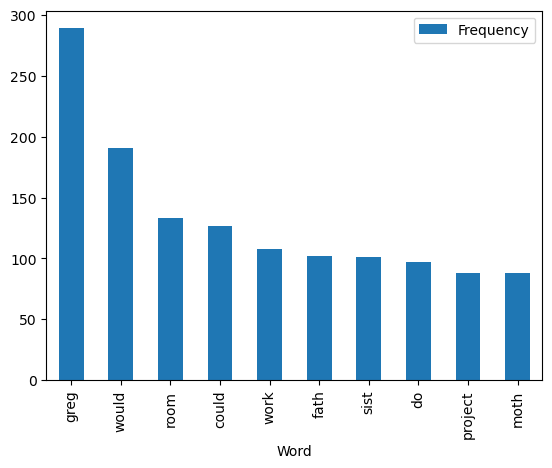

In [47]:
df.plot(kind='bar',x='Word', y='Frequency')

In [48]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['red', 'blue', 'green', 'gray'])

In [51]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


In [52]:
from wordcloud import WordCloud

In [53]:
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

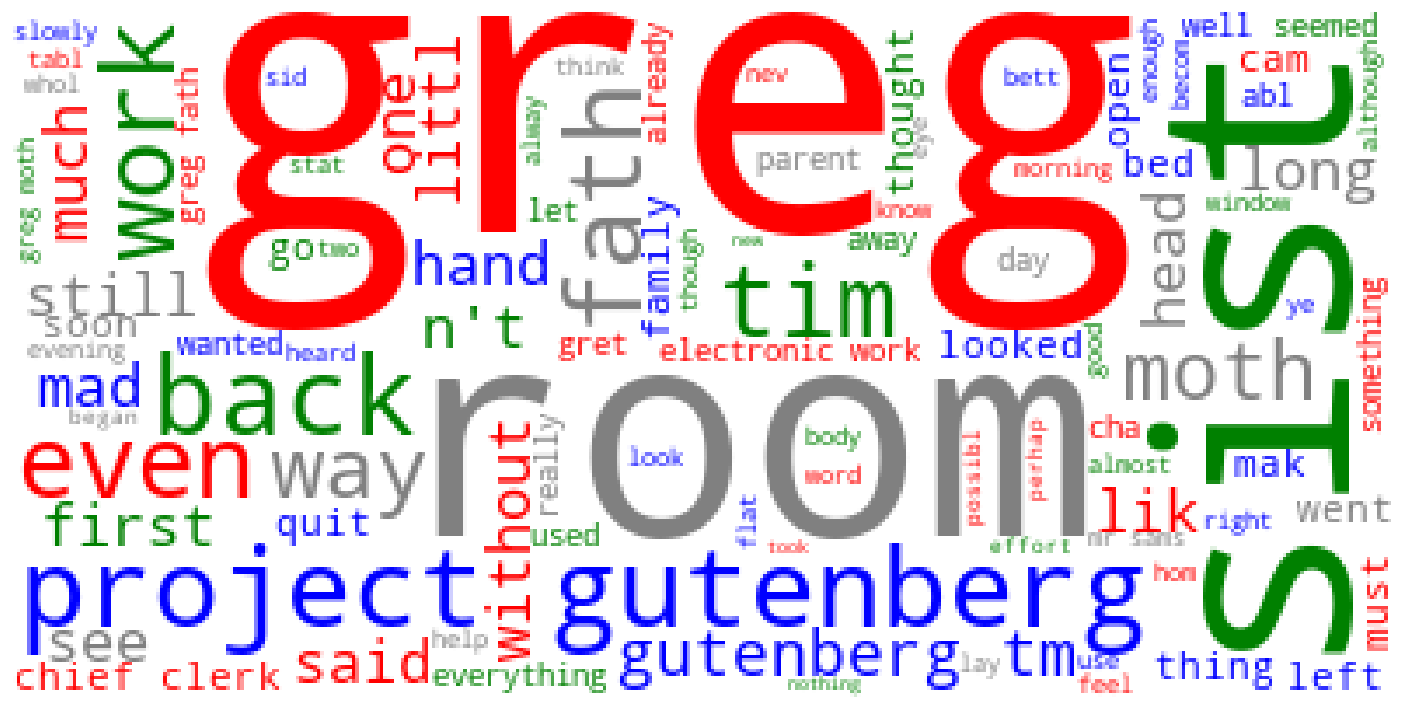

In [59]:
import matplotlib.pyplot as plt
cloud = cloud.generate(texto_limpo)
plt.figure(figsize=(18,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

----